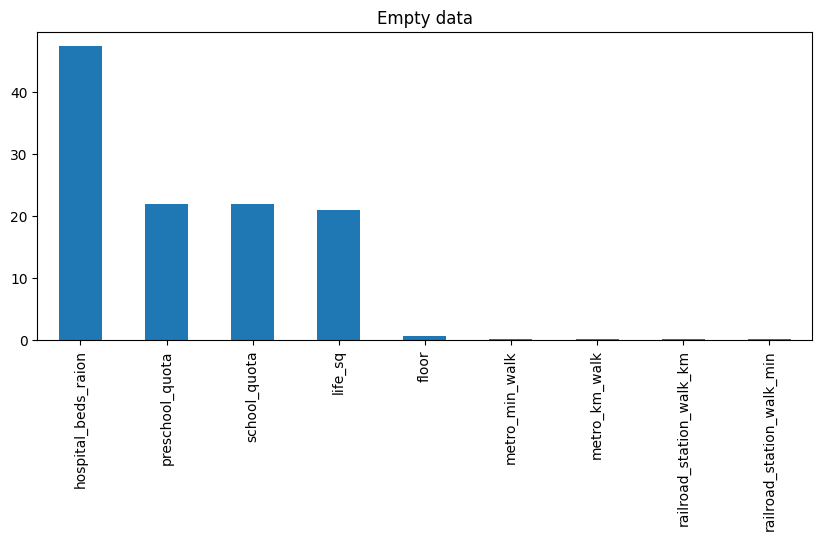

In [10]:
# PYTHON-14. Очистка данных
# 2. Знакомство с новыми данными: данные о квартирах от Сбера

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.expand_frame_repr', False)

sber_data = pd.read_csv('data/sber_data.csv')


# print(sber_data.isnull().tail())
# 2.1

cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
# print(cols_with_null)
cols_with_null.plot(
    kind='bar',
    figsize=(10,4),
    title="Empty data"
);


In [11]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
display(drop_data.shape)
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
display(drop_data.shape)

(30471, 61)

(20888, 60)

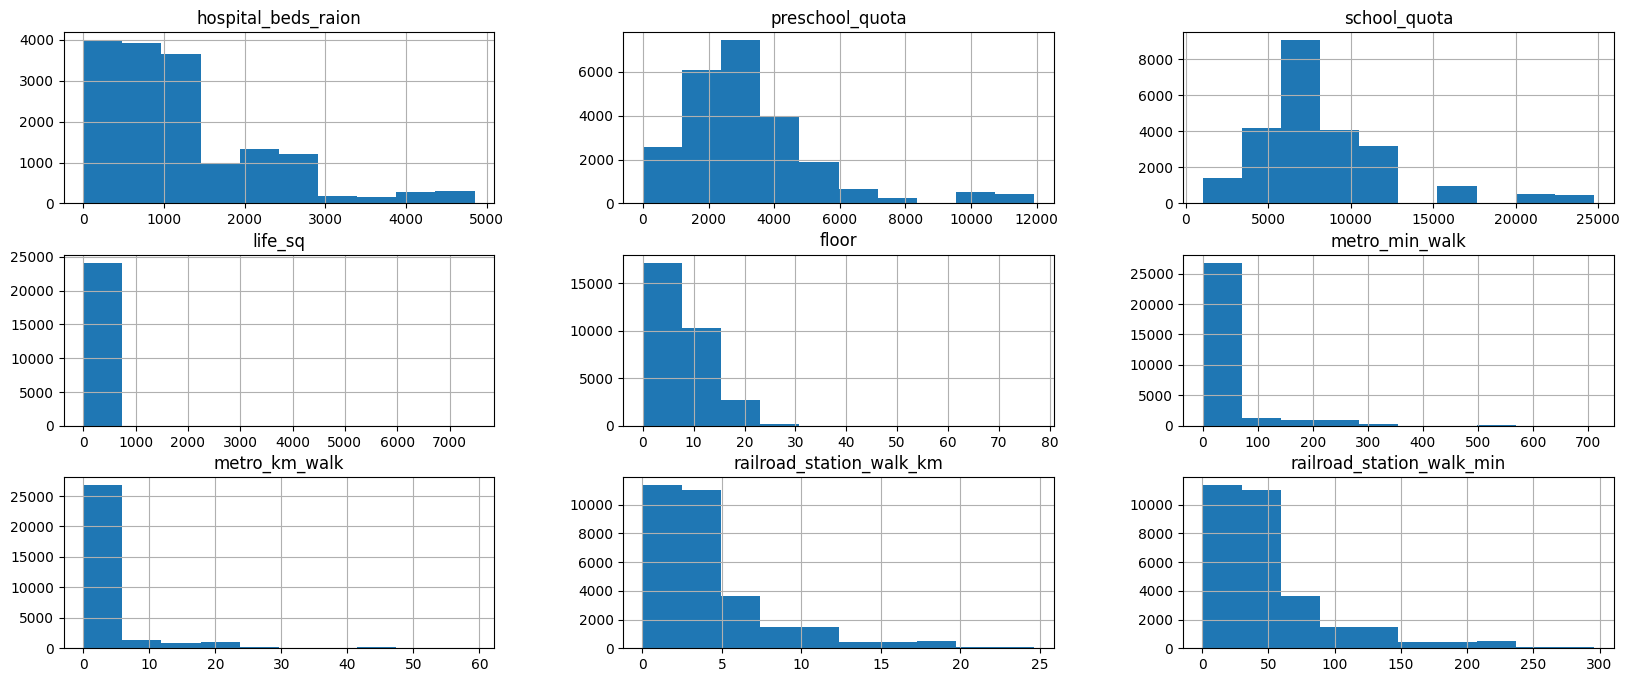

In [12]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20,8));